## Ejemplo 1: Usando la librería Requests

### 1. Objetivos:
    - Aprender a usar la librería Requests para hacer peticiones HTTP a una API
 
### 2. Desarrollo:

Vamos a implementar un programa que realice una llamada (petición) HTTP a la API de NASA, esta llamada es en realidad una consulta de datos con cierto formato que la API de la NASA entiende para que nos regrese una respuesta con los datos solicitados.


Lo primero es la instalación del módulo`requests` de Python usando la siguiente celda o desde la terminal, tal como los has realizado antes con el módulo `Pandas`:

In [ ]:
!pip install requests

Después a importar los módulos necesarios:

In [3]:
import pandas as pd
import requests

Una API puede ofrecer mucha información y en general es organizada por cateogorías o conjuntos de datos y a cada conjunto de datos la API asigna una dirección de tipo URL o link conocidas como endpoint o punto de acceso.

Entonces, vamos a realizar consultas para obtener información sobre objetos que orbitan cerca de la Tierra (¡y potencialmente podrían colicionar!). Se pueden ver la documentación [aquí](https://api.nasa.gov/).

Ahí podemos ver los puntos de acceso (endpoints) y la manera en la que se usa el API Key. Ve a la página y consigue tu propia Api Key para que puedas realizar los ejercicios.

Ahora, para empezar, necesitamos nuestro url del punto de acceso y nuestro diccionario con los parámetros de acceso. La URL la podemos obtener al consultar la página en la sección **Browse API** y luego buscando la operación que nos permite realizar una consulta sobre todos los objetos cercanos llamada **Neo Browse** y el link es:

    GET https://api.nasa.gov/neo/rest/v1/neo/browse/

En cuanto a los parámetros, del ejemplo mostrado adicional a la url se observa que al final existe lo siguiente `?api_key=DEMO_KEY`, todo lo que sigue después del símbolo `?` se puede considerar como parámetros, sin embargo este punto de acceso no está muy bien documentado y veremos en adelante como obtener más parámetros, así que por lo pronto los parámetros serán el `api_key` y usaremos el obtenido al realizar el registro.

In [12]:
url = 'https://api.nasa.gov/neo/rest/v1/neo/browse/'
parametros = {'api_key': 'EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5'}

Ambos se los pasamos al método `GET` de `requests` para realizar la petición y enviar los parámetros como información extra que el API necesita usando la forma:

`requests.get(-url del punto final-, params=-dict con parámetros-)`

Porqué el método `GET` porque así está definido por la API.

In [13]:
respuesta = requests.get(url, params=parametros)

Ahora, podemos leer el estado de la respuesta usando:

`mi_respuesta.status_code`

In [14]:
respuesta.status_code

200

Ahora veamos los datos incluídos en la respuesta originalmente en formato json, convertidos a tipos de datos de Python usando el método `mi_respuesta.json()`:

In [17]:
respuesta.json()

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=1&size=20&api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5',
  'self': 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=0&size=20&api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5'},
 'page': {'size': 20,
  'total_elements': 33125,
  'total_pages': 1657,
  'number': 0},
 'near_earth_objects': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2000433?api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5'},
   'id': '2000433',
   'neo_reference_id': '2000433',
   'name': '433 Eros (A898 PA)',
   'name_limited': 'Eros',
   'designation': '433',
   'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433',
   'absolute_magnitude_h': 10.41,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 22.0067027115,
     'estimated_diameter_max': 49.2084832235},
    'meters': {'estimated_diameter_min': 22006.7027114738,
     'estimated_diameter_max': 49208.4832234845},
    'miles': {'estimated_diameter_min': 13.

In [15]:
respuesta.text

'{"links":{"next":"http://api.nasa.gov/neo/rest/v1/neo/browse?page=1&size=20&api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5","self":"http://api.nasa.gov/neo/rest/v1/neo/browse?page=0&size=20&api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5"},"page":{"size":20,"total_elements":33125,"total_pages":1657,"number":0},"near_earth_objects":[{"links":{"self":"http://api.nasa.gov/neo/rest/v1/neo/2000433?api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5"},"id":"2000433","neo_reference_id":"2000433","name":"433 Eros (A898 PA)","name_limited":"Eros","designation":"433","nasa_jpl_url":"http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433","absolute_magnitude_h":10.41,"estimated_diameter":{"kilometers":{"estimated_diameter_min":22.0067027115,"estimated_diameter_max":49.2084832235},"meters":{"estimated_diameter_min":22006.7027114738,"estimated_diameter_max":49208.4832234845},"miles":{"estimated_diameter_min":13.6743268705,"estimated_diameter_max":30.5767244291},"feet":{"estimated_diameter_min":72200.470523

¡Esa es una respuesta muy larga! Vamos a diseccionarla, primero vamos a asignarla a una variable y vale la pena observar que el tipo de datos principal es un diccionario de Python, entonces asignesmos el resultado a la variable `datos`:

In [18]:
datos = respuesta.json()
print(type(datos))

<class 'dict'>


Para conocer cuales son las llaves de un diccionario usamos el método:

`diccionario.keys()`

y podemos aplicar el método `.keys()` porque la variable `datos` es un diccionario, capichi!

In [19]:
datos.keys()

dict_keys(['links', 'page', 'near_earth_objects'])

Entonces comenzamos a examinar los valores que tienen cada una de las llaves y comenzamos con la llave `links`:

In [21]:
datos["links"]

{'next': 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=1&size=20&api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5',
 'self': 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=0&size=20&api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5'}

Ahora en la llave `page`:

In [22]:
datos["page"]

{'size': 20, 'total_elements': 33125, 'total_pages': 1657, 'number': 0}

Y finalmente en la llave `near_earth_objects`:

In [25]:
datos["near_earth_objects"][19]

{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2001980?api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5'},
 'id': '2001980',
 'neo_reference_id': '2001980',
 'name': '1980 Tezcatlipoca (1950 LA)',
 'name_limited': 'Tezcatlipoca',
 'designation': '1980',
 'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001980',
 'absolute_magnitude_h': 13.87,
 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 4.4725476543,
   'estimated_diameter_max': 10.0009205877},
  'meters': {'estimated_diameter_min': 4472.5476543253,
   'estimated_diameter_max': 10000.9205876786},
  'miles': {'estimated_diameter_min': 2.7791114085,
   'estimated_diameter_max': 6.2142820265},
  'feet': {'estimated_diameter_min': 14673.7132462166,
   'estimated_diameter_max': 32811.4203008795}},
 'is_potentially_hazardous_asteroid': False,
 'close_approach_data': [{'close_approach_date': '1921-07-08',
   'close_approach_date_full': '1921-Jul-08 00:32',
   'epoch_date_close_approach': -1530055680000,
   

Esta última como el nombre de la llave lo indica, es la lista de objetos en la respuesta obtenida, así que vamos a asignarlos a la variable `objetos`, hay que notar que entonces ahora la variable `objetos` es de tipo `list` de Python, así que podemos acceder a los elementos por índices numéricos de forma ordenada, entonce obtengamos sólo el primer elemento:

In [26]:
objetos = datos["near_earth_objects"]
objetos[0]

{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2000433?api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5'},
 'id': '2000433',
 'neo_reference_id': '2000433',
 'name': '433 Eros (A898 PA)',
 'name_limited': 'Eros',
 'designation': '433',
 'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433',
 'absolute_magnitude_h': 10.41,
 'estimated_diameter': {'kilometers': {'estimated_diameter_min': 22.0067027115,
   'estimated_diameter_max': 49.2084832235},
  'meters': {'estimated_diameter_min': 22006.7027114738,
   'estimated_diameter_max': 49208.4832234845},
  'miles': {'estimated_diameter_min': 13.6743268705,
   'estimated_diameter_max': 30.5767244291},
  'feet': {'estimated_diameter_min': 72200.4705239119,
   'estimated_diameter_max': 161445.1600989368}},
 'is_potentially_hazardous_asteroid': False,
 'close_approach_data': [{'close_approach_date': '1900-12-27',
   'close_approach_date_full': '1900-Dec-27 01:30',
   'epoch_date_close_approach': -2177879400000,
   'relative_vel

En cuanto a las llaves `links` y `page` son metadata que vamos a utilizar luego para automatizar el proceso de peticiones.

El siguiente paso es convertir nuestra lista de objetos diccionarios en un `DataFrame`, para ello aplicamos un proceso conocido como normalización, que consiste en acomodar la información por columnas y no por filas (una fila es un objeto en este caso) usando la función:

`pd.json_normalize(-objetos_dict-)`

esto nos regresa un `DataFrame` listo para ser procesado, así que vamos a guardar el resultado en la variable `objetos_df`:

In [27]:
objetos_df = pd.json_normalize(objetos)
objetos_df

,id,neo_reference_id,name,name_limited,designation,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,...,orbital_data.perihelion_distance,orbital_data.perihelion_argument,orbital_data.aphelion_distance,orbital_data.perihelion_time,orbital_data.mean_anomaly,orbital_data.mean_motion,orbital_data.equinox,orbital_data.orbit_class.orbit_class_type,orbital_data.orbit_class.orbit_class_range,orbital_data.orbit_class.orbit_class_description
0,2000433,2000433,433 Eros (A898 PA),Eros,433,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000433,10.41,False,"[{'close_approach_date': '1900-12-27', 'close_...",False,...,1.133253673250917,178.9077640079513,1.782981151356617,2460445.663729495556,222.7628947251168,.5597773600412238,J2000,AMO,1.017 AU < q (perihelion) < 1.3 AU,Near-Earth asteroid orbits similar to that of ...
1,2000719,2000719,719 Albert (A911 TB),Albert,719,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000719,15.59,False,"[{'close_approach_date': '1909-08-21', 'close_...",False,...,1.194321237174303,156.2302183725104,4.078499484532715,2459955.999514783378,56.29428204183947,.2302420054175519,J2000,AMO,1.017 AU < q (perihelion) < 1.3 AU,Near-Earth asteroid orbits similar to that of ...
2,2000887,2000887,887 Alinda (A918 AA),Alinda,887,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2000887,13.88,False,"[{'close_approach_date': '1910-01-04', 'close_...",False,...,1.060879051972014,350.4736961936459,3.883698936442366,2460678.677100750642,238.7605395112643,.2535450992914844,J2000,AMO,1.017 AU < q (perihelion) < 1.3 AU,Near-Earth asteroid orbits similar to that of ...
3,2001036,2001036,1036 Ganymed (A924 UB),Ganymed,1036,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001036,9.26,False,"[{'close_approach_date': '1910-02-25', 'close_...",False,...,1.24510011940967,132.4774027721871,4.08651816616544,2460569.610667584365,276.4171662679224,.226443831274461,J2000,AMO,1.017 AU < q (perihelion) < 1.3 AU,Near-Earth asteroid orbits similar to that of ...
4,2001221,2001221,1221 Amor (1932 EA1),Amor,1221,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001221,17.37,False,"[{'close_approach_date': '1900-03-08', 'close_...",False,...,1.082992870755625,26.64829543646065,2.755167126498775,2459867.288200050473,123.533523225551,.3707357399835873,J2000,AMO,1.017 AU < q (perihelion) < 1.3 AU,Near-Earth asteroid orbits similar to that of ...
5,2001566,2001566,1566 Icarus (1949 MA),Icarus,1566,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001566,16.59,True,"[{'close_approach_date': '1902-06-11', 'close_...",False,...,.1866259313071519,31.43790437302617,1.969530562040674,2460008.961551393165,168.6493279381757,.8804985587220497,J2000,APO,a (semi-major axis) > 1.0 AU; q (perihelion) <...,Near-Earth asteroid orbits which cross the Ear...
6,2001580,2001580,1580 Betulia (1950 KA),Betulia,1580,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001580,14.69,False,"[{'close_approach_date': '1911-05-07', 'close_...",False,...,1.127241117241443,159.5887174193308,3.267776617179313,2460735.558970899653,198.113822113195,.3025576369920647,J2000,AMO,1.017 AU < q (perihelion) < 1.3 AU,Near-Earth asteroid orbits similar to that of ...
7,2001620,2001620,1620 Geographos (1951 RA),Geographos,1620,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001620,15.27,True,"[{'close_approach_date': '1901-08-23', 'close_...",False,...,.8277373254034206,276.9535910814548,1.663634359201871,2460192.258189262839,5.842704450326863,.7089102912764915,J2000,APO,a (semi-major axis) > 1.0 AU; q (perihelion) <...,Near-Earth asteroid orbits which cross the Ear...
8,2001627,2001627,1627 Ivar (1929 SH),Ivar,1627,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2001627,12.85,False,"[{'close_approach_date': '1901-07-11', 'close_...",False,...,1.124766625574738,167.8142101557517,2.602278858422502,2460196.690059331312,1.476115160616382,.3874378340712469,J2000,AMO,1.017 AU < q (perihelion) < 1.3 AU,Near-Earth asteroid orbits similar to that of ...
9,2001685,2001685,1685 Toro (1948 OA),Toro,1685,http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=200

Ahora veamos las dimensiones del dataframe con `df.shape`:

In [28]:
objetos_df.shape

(20, 44)

¡Listo! Ya tenemos un `DataFrame` con los datos de nuestra primera petición. En esta sesión vamos a aprender a automatizar este proceso. Pero antes, practiquemos un poco el uso de la librería `requests`.

---
---

## Reto 1: Peticiones a una API usando requests

### 1. Objetivos:
    - Usar la librería Requests para hacer una petición HTTP a una API
 
---
    
### 2. Desarrollo:

### a) Petición HTTP a API de NASA

Vamos a implementar un programa que realice una llamada HTTP a la API de NASA.

Puedes leer la documentación de la API [aquí](https://api.nasa.gov/), bajo el título de "Asteroids NeoWs".

Tu reto consiste en los siguientes pasos:

1. Copia la API Key en la celda debajo para que puedas usarla más adelante:

In [ ]:
api_key = ""

2. Asigna la variable `url` -donde tendrás el URL base de la API de NASA- y la variable `parametros` -donde tendrás el diccionario que usarás para pasar parámetros a tu petición.

3. Usa tu diccionario `parametros` para agregar los parámetros necesarios para pedir la hoja número 100 de la API. Durante el ejemplo, pedimos simplemente la primera hoja. En esta ocasión, debes de descubrir que parámetros requieres pasarle para obtener la hoja #100. Además queremos que el número de resultados que nos regresen sea menor al default. El default es 20, pero tú tienes que mandar los parámetros adecuados para que te regresen solamente 5 resultados

In [29]:
url = 'http://api.nasa.gov/neo/rest/v1/neo/browse?page=100&size=5&api_key=EtSDBzChRyQL87tRvf6vAemUDFCJujscffspj9i5'
parametros = {}

4. Realiza tu petición HTTP aquí debajo y checa tu código de respuesta para asegurarte de que la petición se haya hecho exitosamente:

In [30]:
respuesta = requests.get(url)

In [31]:
respuesta.status_code

200

5. Si todo ha salido bien, extrae tus datos, normalízalos, crea un `DataFrame` con ellos y asígnalo a `objetos`. Revisa que solamente tengas 5 filas, para saber que tu petición se realizó exitosamente:

In [32]:
datos_p100 = respuesta.json()

In [33]:
datos_p100["page"]

{'size': 5, 'total_elements': 33125, 'total_pages': 6625, 'number': 100}

In [ ]:
objetos_p100 = 

In [ ]:
objetos_p100_df = 

objetos_p100_df

A continuación la celda de validación, en esta ocasión se genera una gráfica de barras del diámetro de los 5 objetos obtenidos, para ello es necesario contar con el módulo **SeaBorn**, así que para instalarlo puedes ejecutar el siguiente comando en la Terminar o en la ventana de Anaconda Prompt:

`pip install seaborn`

o puedes intentar ejecutar la siguiente celda:

In [ ]:
!pip install seaborn

Después de haber realizado la instalación entonces ejecuta la celda para obtener tu gráfica ...

In [ ]:
def visualizar_diametros(objetos):
    
    import seaborn as sns
    
    sns.set(rc={'figure.figsize':(15,5)})
    sizes = objetos[['name', 'estimated_diameter.kilometers.estimated_diameter_max']].copy()
    sizes.sort_values('estimated_diameter.kilometers.estimated_diameter_max', ascending=True, inplace=True)
    g = sns.barplot(x=sizes['name'], y=sizes['estimated_diameter.kilometers.estimated_diameter_max'])
    
visualizar_diametros(objetos_p100_df)

Tu gráfica debe ser similar a la siguiente:

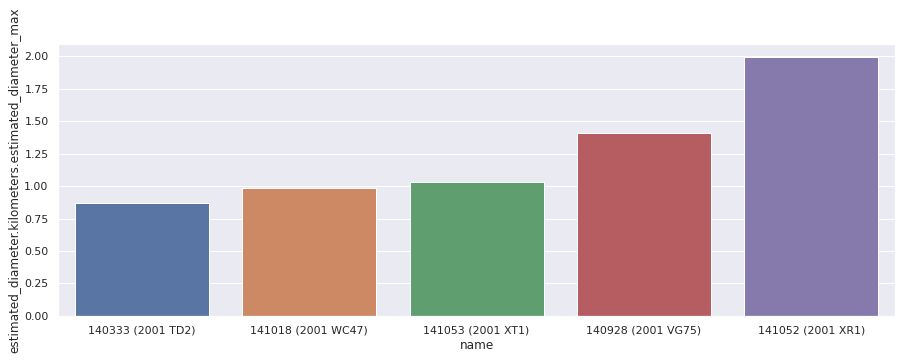